In [1]:
from shapely.geometry import Polygon
from model.RegionsCalcs import create_regions
from model.RegionsPlotter import standard_plot, plot_algorithm_result
import numpy as np
from model.NetworkGraph import CompleteGraph
from numpy import random
import matplotlib.pyplot as plt
from tecno_analysis.dimensioning_algorithm_tecnoechonomics import DimensioningAlgorithmTecnoeconomics

# All HL4 with HPLD and all HL5 with Femto

No need to determine anything

In [2]:
# Import the network
graph = CompleteGraph.of_sources("../Passion_Xtreme_III.mat", "../NameTypes.xlsx")

Discarded nodes: 39
Discarded links: 0
Links: 174
Nodes: 154

*-*-* Printing information about the imported network *-*-*

Num nodes: 154
Num links: 174
Num HL4: 20
Num HL5: 134
Average distance: 2.58
Max distance (km): 22.00
Min distance (km): 0.18
Average degree: 2.27
Min degree: 1
Max degree: 10
Average degree HL4: 1.95
Average degree HL5: 2.32
Total bidirectional link length (km): 448.84


In [3]:
graph.network_polygon_bounds

[(0.0, 0.0),
 (0.0, 35.57836559188485),
 (34.593073727138425, 35.57836559188485),
 (34.593073727138425, 0.0),
 (0.0, 0.0)]

In [4]:
num_nodes = len(graph.nodes)
tentative_nodes_for_femtocells = np.zeros(num_nodes, dtype=int)

pick_prob = 0.5
for i, node in enumerate(graph.nodes):
    if node.type == "HL5" and random.random() < pick_prob:
        tentative_nodes_for_femtocells[i] = 1
        
tentative_range_for_femtocells = np.ones(num_nodes)
base_area = graph.network_polygon_bounds
node_power = np.array([0.1 if node.type == "HL5" else 40 for node in graph.nodes])


In [5]:
node_adjacencies_matrix = np.array(graph.adjacency_matrix)
node_positions = np.array([node.pos for node in graph.nodes])
node_type_hl4 = np.array([1 if node.type == "HL4" else 0 for node in graph.nodes])
node_type_hl5 = np.array([1 if node.type == "HL5" else 0 for node in graph.nodes])
traffic_injection = np.array([node.estimated_traffic_injection for node in graph.nodes])
fixed_nodes_for_hpld = node_type_hl4.copy()
tentative_nodes_for_hpld = np.zeros(num_nodes, dtype=int)
tentative_nodes_for_femtocells = node_type_hl5.copy()
tentative_range_for_femtocells = np.ones(num_nodes)
nodes_for_macrocells = node_type_hl4.copy()
range_for_macrocells = np.ones(num_nodes)
alpha_loss = 3
max_runtime_seconds = 180.0
euclidean_to_km_scale = 1.0
power_for_hpld = np.ones(num_nodes) * 5
power_for_femtocells = np.ones(num_nodes) * 0.1
power_for_macrocells = np.ones(num_nodes) * 40
alpha = 0.31
base_area = graph.network_polygon_bounds



In [6]:
# nodes_with_hpld, nodes_with_femtocells, hpld_to_femtocell_association, heuristic_1_evolution, heuristic_2_evolution = algorithm.run_algorithm(max_runtime_seconds=max_runtime_seconds)

In [7]:
nodes_with_hpld = node_type_hl4.copy()
nodes_with_femtocells = node_type_hl5.copy()
hpld_to_femtocell_association = np.zeros((num_nodes, num_nodes))
heuristic_1_evolution = []
heuristic_2_evolution = []


In [8]:
nodes_with_hpld

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [9]:
nodes_with_femtocells

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
hpld_to_femtocell_association

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
node_positions

array([[10.81368257, 33.57836559],
       [16.69026513, 17.61496551],
       [24.85323932, 14.36374894],
       [12.00012644, 10.42867577],
       [22.4564953 , 16.6990066 ],
       [14.99625026, 13.39637459],
       [22.65222109, 22.53048249],
       [17.74017233, 10.05124959],
       [25.51098711, 21.78986516],
       [23.97340452, 18.51306172],
       [27.88509478, 22.19212142],
       [ 9.68725445,  7.17274948],
       [20.10155215, 15.65904674],
       [ 7.40983853, 10.96059539],
       [30.26365018, 15.86387668],
       [18.31915707, 13.10675426],
       [ 3.48321752, 26.51314547],
       [17.22890691, 21.82360317],
       [18.57220737,  4.41188527],
       [20.1352073 , 14.51723008],
       [19.19749114, 16.80840664],
       [ 3.62286201, 15.51776993],
       [15.6841772 , 23.83609916],
       [ 4.32823348, 12.68257803],
       [10.44467001,  8.25684298],
       [20.39782648, 23.55398832],
       [22.79541761, 28.03102833],
       [14.10677013, 18.15691877],
       [11.97724091,

In [12]:
tentative_nodes_for_femtocells

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
tentative_range_for_femtocells

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [14]:
traffic_injection

array([ 250, 1000,  500,  500, 1000, 1000, 1000,  500,  500, 1000,  500,
        250, 1000,  250,  250, 1000,  250, 1000,  250, 1000, 1000,  250,
        500,  250,  250, 1000,  500, 1000,  500,  500,  500,  500,  250,
        250,  250,  250,  250, 1000,  500,  500, 1000,  500,  250,  250,
       1000, 1000, 1000, 1000,  500,  500, 1000, 1000, 1000, 1000,  500,
        500, 1000,  500, 1000,  500,  250, 1000,  250,  500,  250,  500,
        500,  250, 1000,  500,  250,  250,  500,  500,  500, 1000,  500,
       1000, 1000,  500,  500, 1000,  500,  500, 1000,  500,  250,  500,
        500, 1000, 1000, 1000, 1000, 1000,  500,  500, 1000, 1000,  500,
        250,  250,  250, 1000,  250,  250,  250,  250,  250,  250, 1000,
        250,  250,  250, 1000,  250, 1000,  500,  500,  250,  500, 1000,
        500,  250,  500,  250,  250,  500, 1000,  250,  250,  500,  250,
        250,  250,  500,  250, 1000,  250,  500,  250,  250,  250, 1000,
       1000,  250,  500, 1000,  500,  250,  250,  2

In [15]:
node_power

array([ 0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1, 40. , 40. , 40. , 40. , 40. , 40. , 40. , 40. , 40. ,
       40. , 40. , 40. , 40. , 40. , 40. , 40. , 40

# Associations

In [16]:
from tecno_analysis.dimensioning_algorithm_associations import NodePositionsAlgorithm

In [17]:
assoc_algo = NodePositionsAlgorithm(nodes_with_femtocells, node_adjacencies_matrix, node_type_hl4, np.zeros(len(node_positions)))

In [18]:
base_associations = assoc_algo.determine_best_associations(nodes_with_hpld)

In [19]:
print(base_associations.shape)
print(base_associations.sum())
base_associations

(154, 154)
100


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [20]:
print(f'Num Femtos associated to 1 HPLD: {(np.sum(base_associations, axis=0) == 1).sum()}')
print(f'Num Femtos not associated to HPLD: {(np.sum(base_associations[:, nodes_with_femtocells == 1], axis=0) == 0).sum()}')
print(f'Num HPLDs emtpy: {(np.sum(base_associations[node_type_hl4 == 1, :], axis=1) == 0).sum()}')
print(f'Num HPLDs with > 5 Femtos: {(np.sum(base_associations[node_type_hl4 == 1, :], axis=1) > 5).sum()}')

Num Femtos associated to 1 HPLD: 100
Num Femtos not associated to HPLD: 34
Num HPLDs emtpy: 0
Num HPLDs with > 5 Femtos: 0


# Plot the femtocells

# TODO

In [21]:
# Common scenario for both cases
# Params
p_tx_fem = 10       # W

femotcells = [
    [node_positions[node][0], node_positions[node][1], 0.1] for node in range(num_nodes) if nodes_with_femtocells[node] == 1
]

In [22]:

regions, _unsold = create_regions(
    np.array(femotcells),
    alpha_loss, 
    polygon_bounds=base_area,
)

In [23]:
regions

{133: <POLYGON ((7.394 18.329, 7.389 18.231, 7.389 18.231, 7.375 18.134, 7.375 18....>,
 132: <POLYGON ((19.618 7.017, 19.625 7.011, 19.625 7.011, 19.691 6.938, 19.691 6....>,
 131: <POLYGON ((4.222 15.024, 4.222 15.024, 4.222 15.024, 4.222 15.024, 4.222 15....>,
 130: <POLYGON ((13.039 22.89, 13.039 22.89, 13.039 22.89, 13.039 22.89, 13.039 22...>,
 129: <POLYGON ((6.236 27.543, 6.233 27.529, 6.233 27.529, 6.21 27.434, 6.21 27.43...>,
 128: <POLYGON ((13.368 32.679, 13.368 32.679, 13.368 32.679, 13.368 32.679, 13.36...>,
 127: <POLYGON ((19.646 23.06, 19.646 23.06, 19.646 23.06, 19.646 23.06, 19.646 23...>,
 126: <POLYGON ((11.554 14.478, 11.554 14.477, 11.554 14.477, 11.587 14.385, 11.58...>,
 125: <POLYGON ((15.643 30.655, 15.589 30.606, 15.589 30.606, 15.51 30.548, 15.51 ...>,
 124: <POLYGON ((21.869 28.363, 21.835 28.368, 21.835 28.368, 21.739 28.392, 21.73...>,
 123: <POLYGON ((13.753 17.236, 13.714 17.153, 13.714 17.153, 13.663 17.069, 13.66...>,
 122: <POLYGON ((10.451 31.361, 

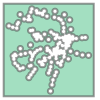

In [24]:
_unsold

In [25]:
area = Polygon(base_area)
print(f'Complete region area:{area.area}')
print(f'Uncovered area:{_unsold.area}')
print(f'Covered area:{area.area - _unsold.area} ({(area.area - _unsold.area) / area.area * 100:.2f}%)')

Complete region area:1230.7650240111575
Uncovered area:922.988144160848
Covered area:307.77687985030946 (25.01%)


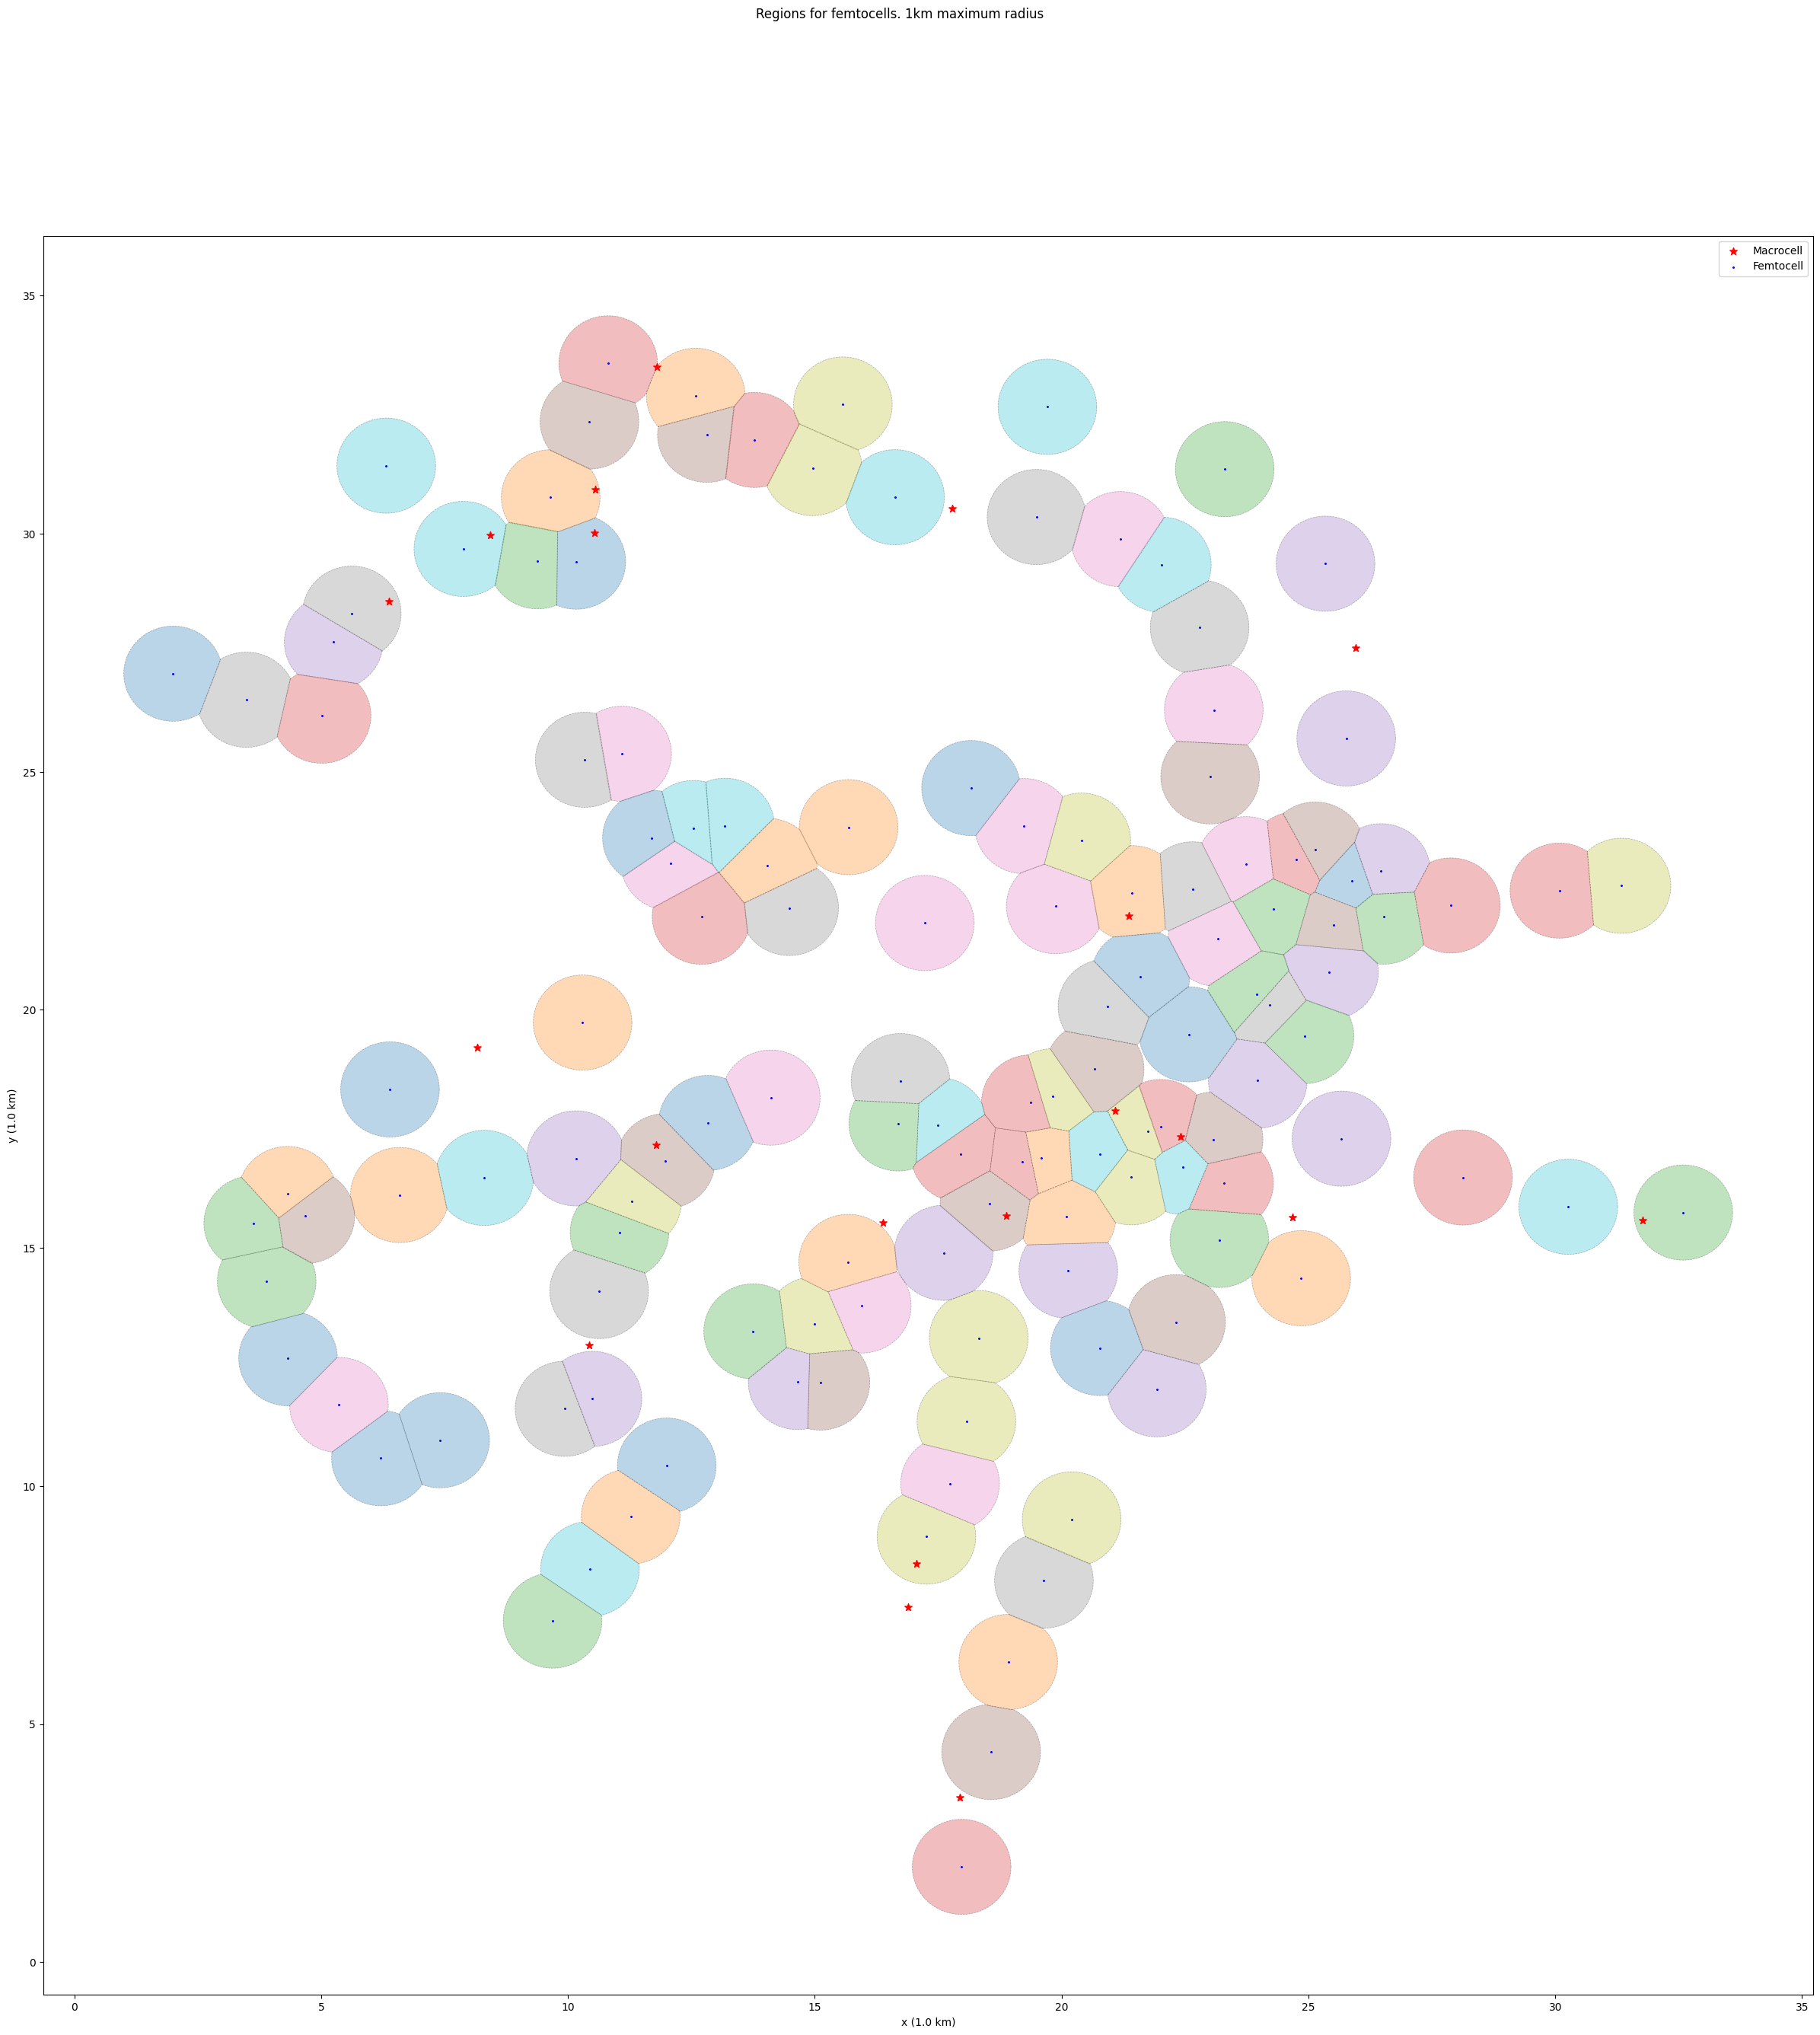

(<Figure size 3000x3000 with 1 Axes>,
 <Axes: xlabel='x (1.0 km)', ylabel='y (1.0 km)'>)

In [26]:
standard_plot(
    regions, 
    graph.nodes, 
    1.0, 
    femtocell_config={"marker": ".", "s": 5},
    plot_config={"title": "Regions for femtocells. 1km maximum radius", "figsize": (30, 30)},
)

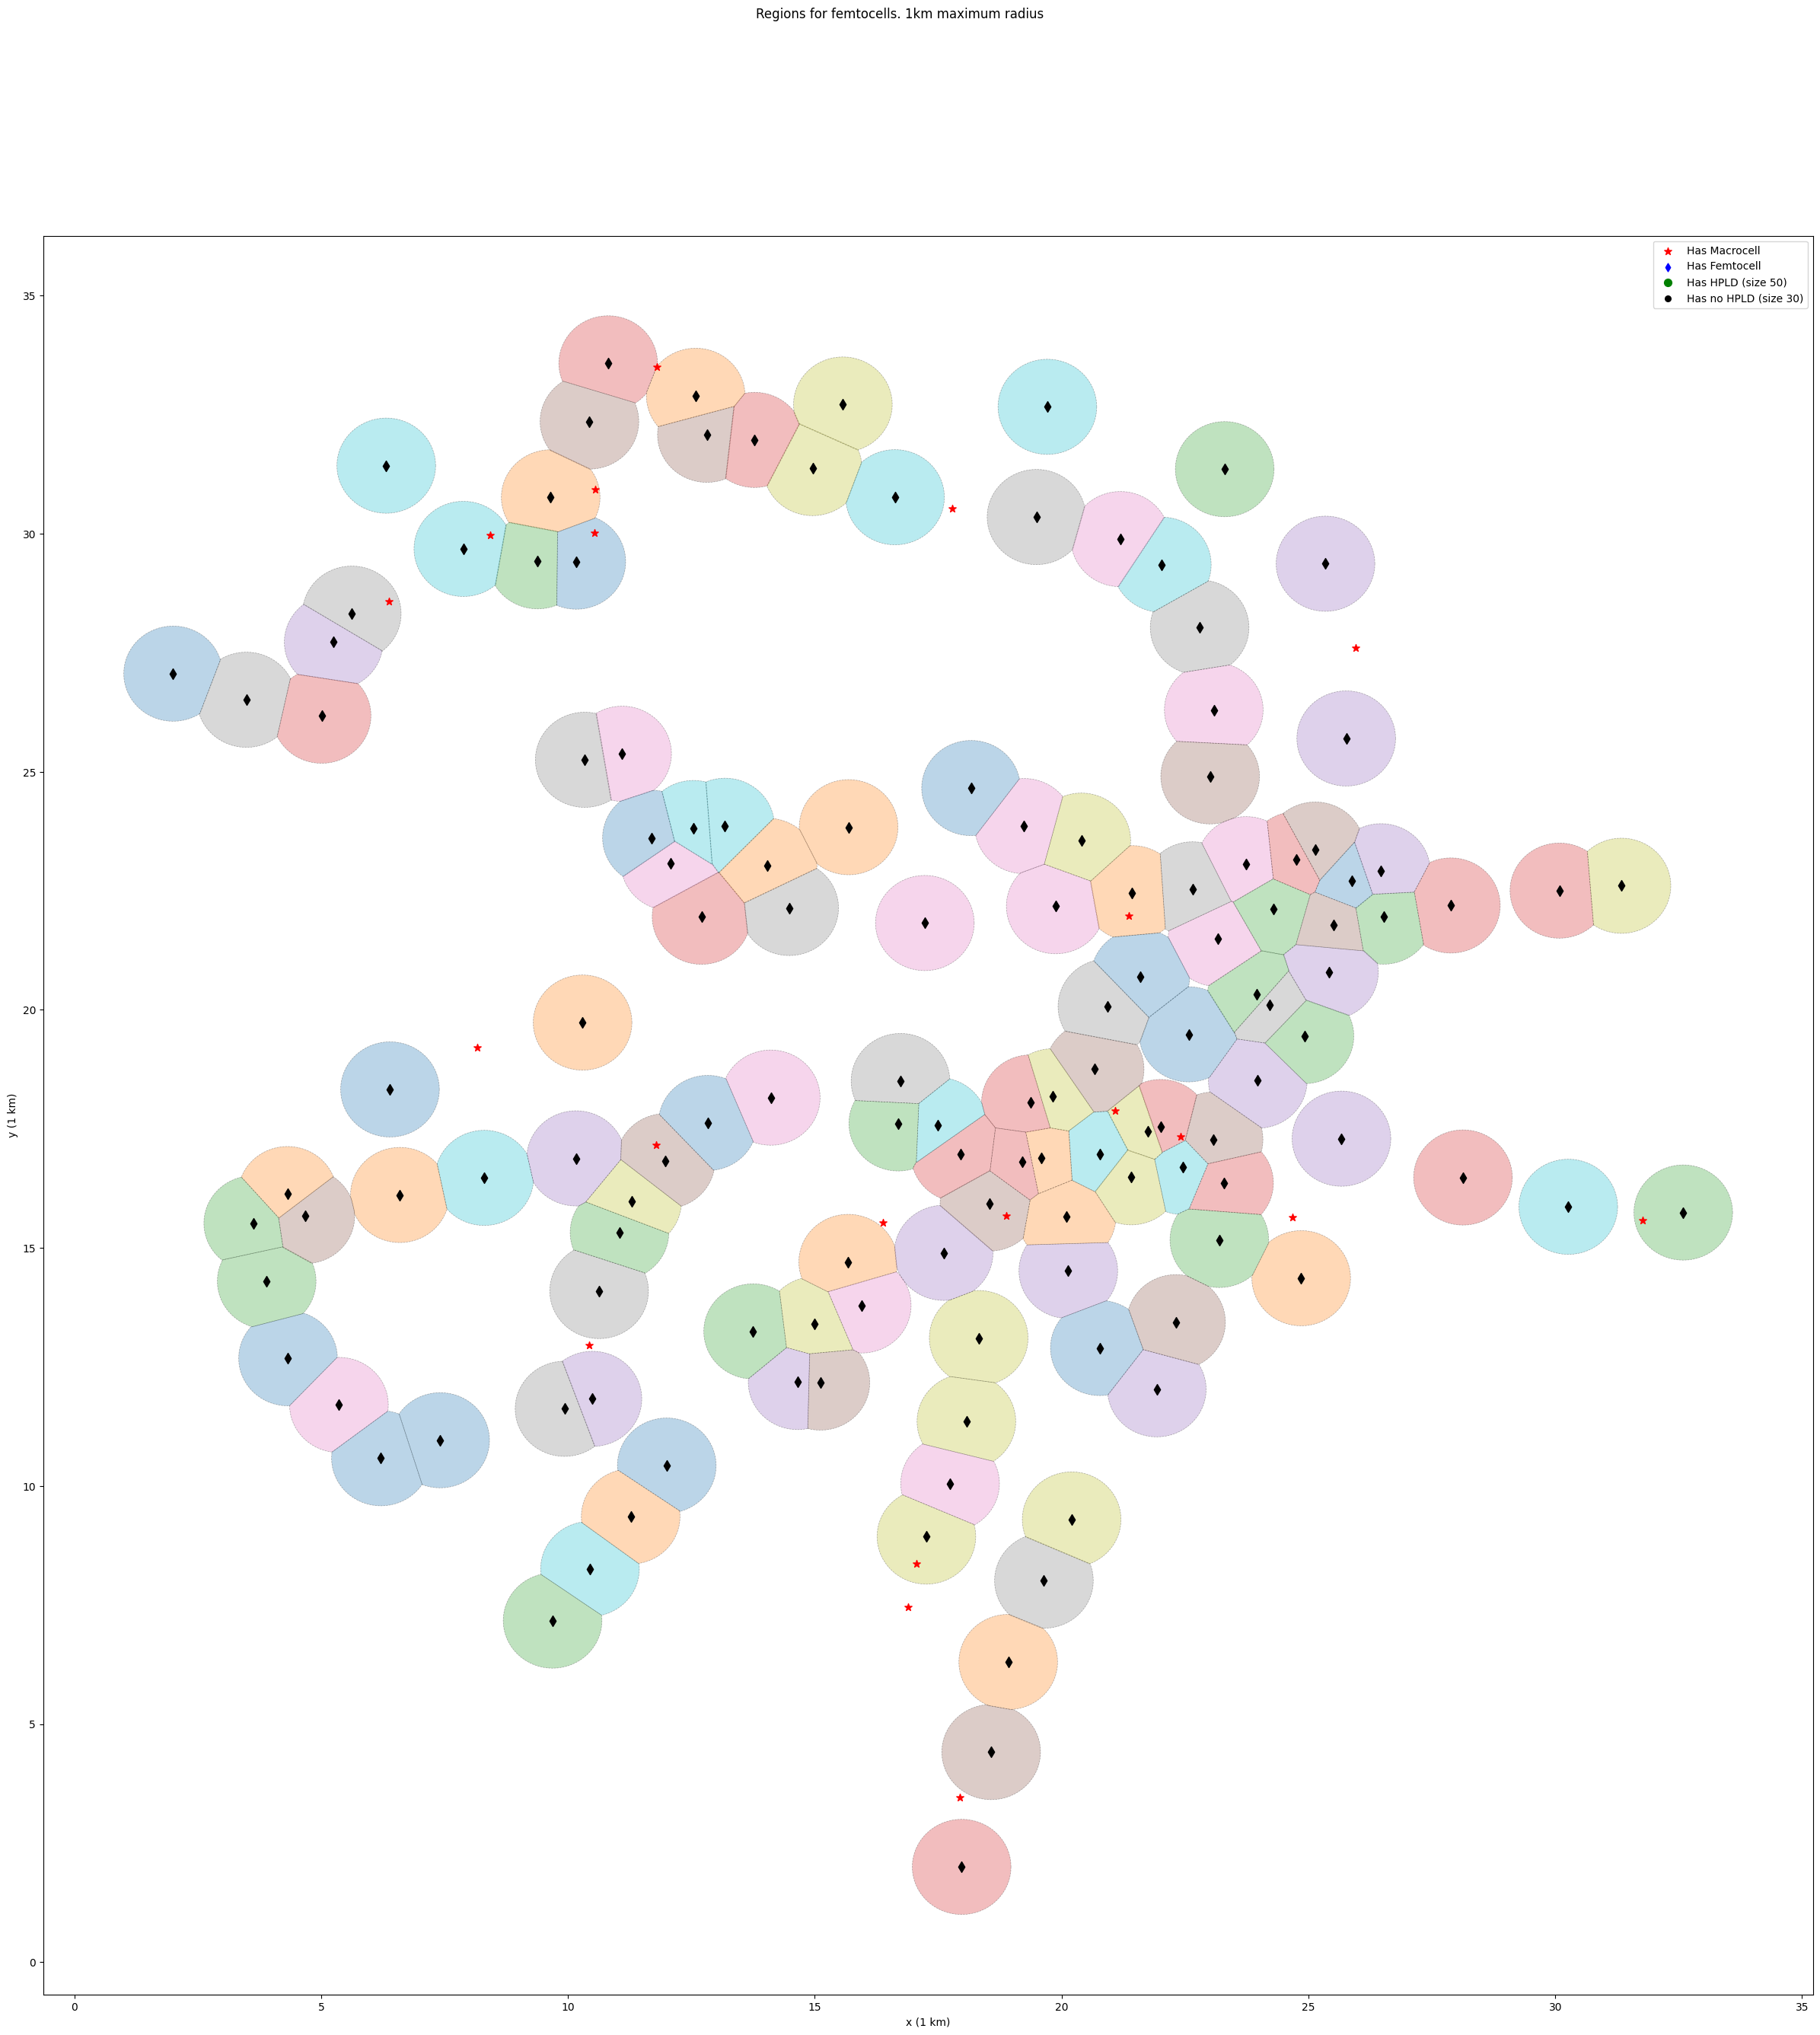

(<Figure size 3000x3000 with 1 Axes>,
 <Axes: xlabel='x (1 km)', ylabel='y (1 km)'>)

In [27]:
# (x, y, has_macrocell, has_femtocell, has_hpld)
nodes = [
    (node_positions[i][0], node_positions[i][1], node_type_hl4[i] == 1, nodes_with_femtocells[i] == 1, nodes_with_hpld[i] == 1)
    for i in range(num_nodes)
]

plot_algorithm_result(
    regions,
    nodes,
    plot_config={"title": "Regions for femtocells. 1km maximum radius", "figsize": (30, 30)},
)

In [28]:
print(f'Total HPLDs: {sum(nodes_with_hpld)}')
print(f'Total Femtocells: {sum(nodes_with_femtocells)}')
print(f'Deployed BW Capacity: {sum(nodes_with_femtocells)} Gbps')
print(f'Estimated Throughput: {sum(traffic_injection[nodes_with_femtocells == 1])/1000:.2f} Gbps')
print(f'Total Covered Area: {area.area - _unsold.area:.2f} ({(area.area - _unsold.area) / area.area * 100:.2f}%)')

Total HPLDs: 20
Total Femtocells: 134
Deployed BW Capacity: 134 Gbps
Estimated Throughput: 77.75 Gbps
Total Covered Area: 307.78 (25.01%)


In [29]:
from model.MatFileStorageParser import FileModel

In [30]:
BaseStations = []

# Add Macrocells
for node in range(len(node_positions)):
    if node_type_hl4[node] == 1:
        BaseStations.append((node_positions[node][0], node_positions[node][1], 40))

NMacroCells = len(BaseStations)
        
# Add Femtocells
for node in range(len(node_positions)):
    if nodes_with_femtocells[node] == 1:
        BaseStations.append((node_positions[node][0], node_positions[node][1], 0.1))
        
NFemtoCells = len(BaseStations) - NMacroCells


# FileModel.save_file_basic("UC1-S3-AllHL4withHPLD-AllHL5withFemto.mat", BaseStations, NFemtoCells, NMacroCells)

In [31]:
from model.RegionsPlotter import plot_regions_deliverable

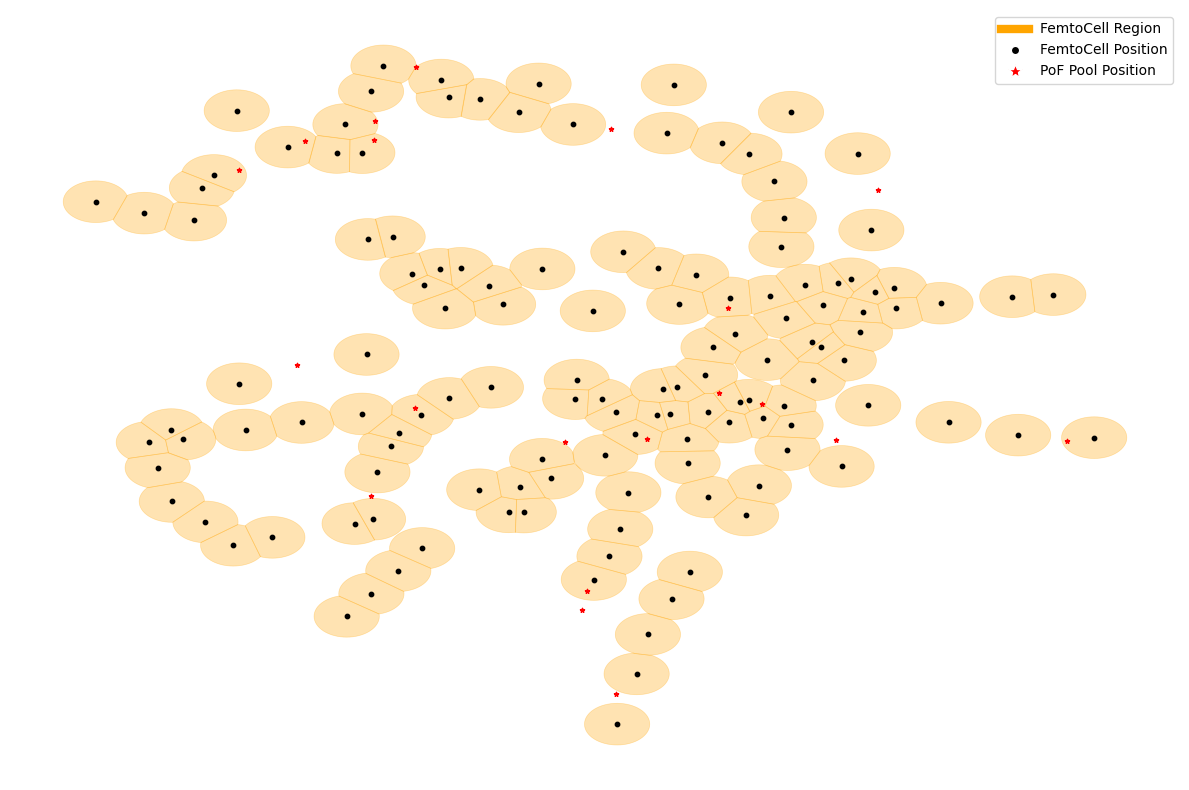

In [32]:
base_stations = [
    (node_positions[i][0], node_positions[i][1], 1) for i in range(len(graph.nodes))
]
fig, ax = plot_regions_deliverable(
    base_stations,
    nodes_with_femtocells,
    nodes_with_hpld,
    base_associations,
    regions,
    title="UC1 - PoF Pools on HL4",
)

/home/elig/Documents/GitHub/PoF_Simulator/model/RegionsPlotter.py:342: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  _ax.annotate(str(i), (_nodes[i][0], _nodes[i][1]), textcoords='offset points', fontsize=8)
/home/elig/Documents/GitHub/PoF_Simulator/model/RegionsPlotter.py:360: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  _ax.annotate(str(i), (_nodes[i][0], _nodes[i][1]), textcoords='offset points', fontsize=8)


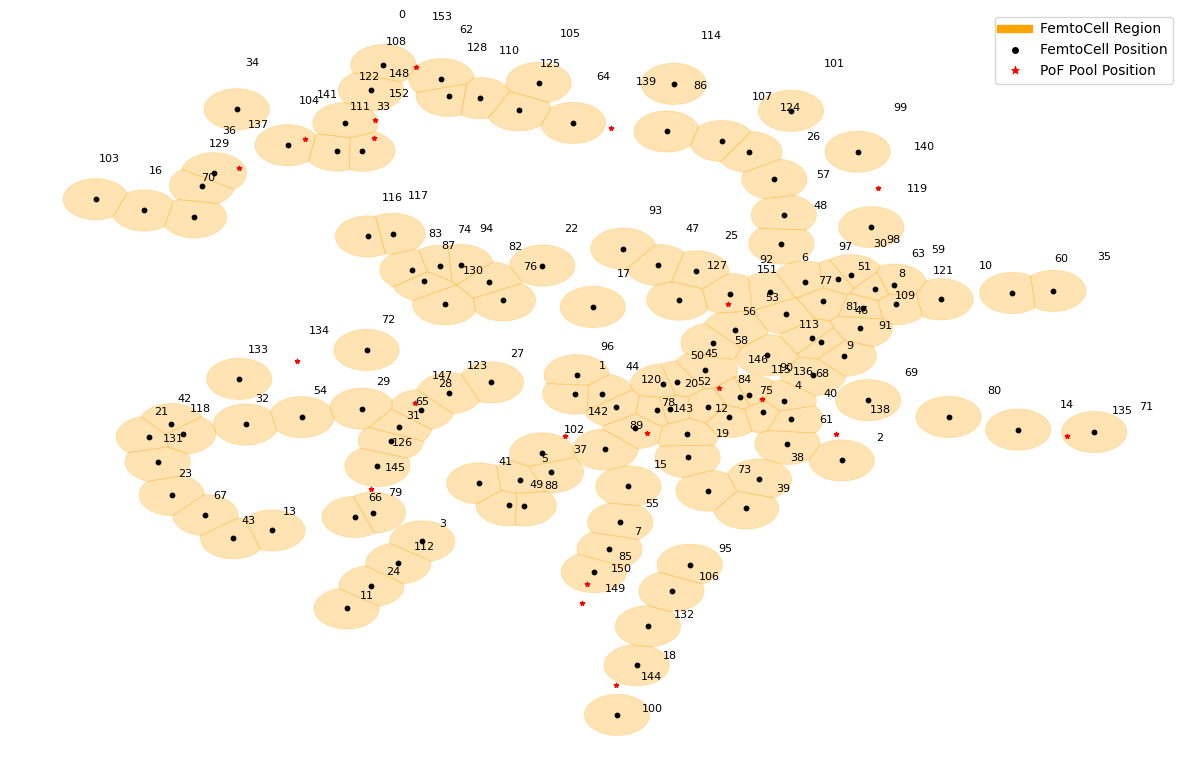

In [33]:
base_stations = [
    (node_positions[i][0], node_positions[i][1], 1) for i in range(len(graph.nodes))
]
fig, ax = plot_regions_deliverable(
    base_stations,
    nodes_with_femtocells,
    nodes_with_hpld,
    base_associations,
    regions,
    title="UC1 - PoF Pools on HL4",
    draw_node_names=True,
)